# 1. 转置卷积

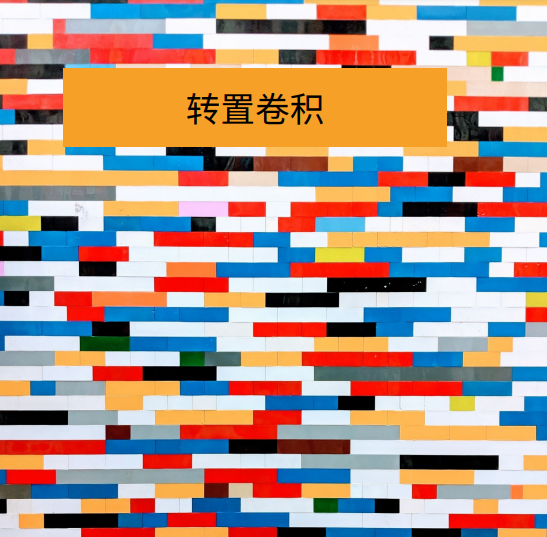

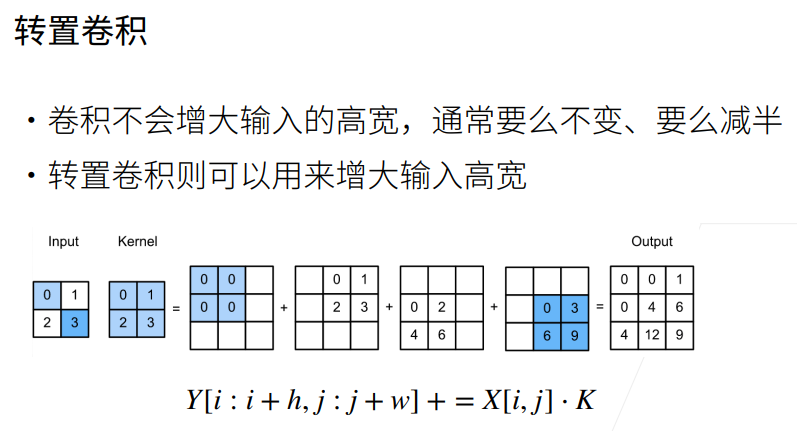

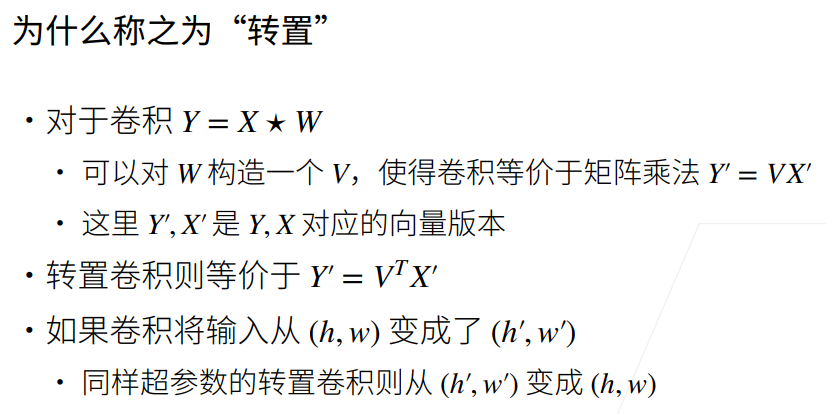

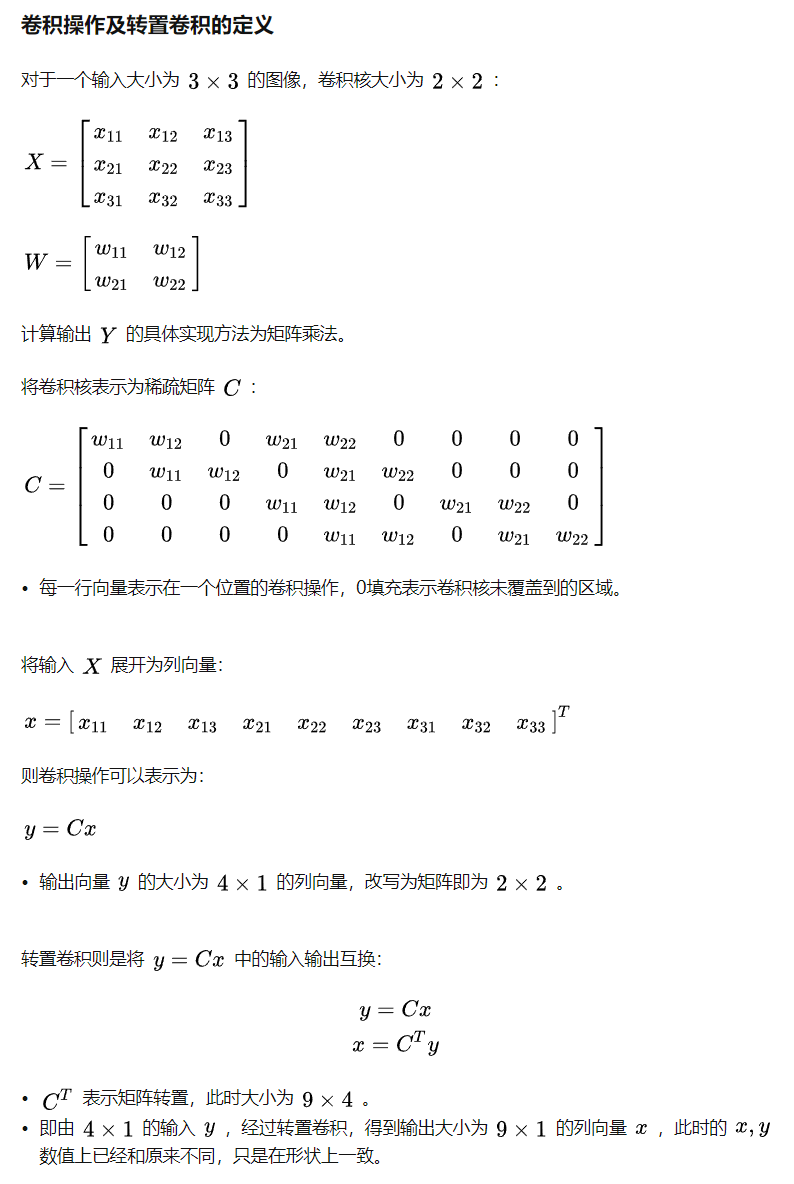

# 2. 转置卷积

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# 实现基本的转置卷积运算
# 定义转置卷积运算
def trans_conv(X, K):
    # 获取卷积核的宽度和高度
    h, w = K.shape # 卷积核的宽、高
    # 创建一个新的张量Y，其尺寸为输入X的尺寸加上卷积核K的尺寸减去1。在常规卷积中，输出尺寸通常是输入尺寸减去卷积核尺寸加1
    Y = torch.zeros((X.shape[0] + h -1, X.shape[1] + w - 1)) # 正常的卷积后尺寸为(X.shape[0] - h + 1, X.shape[1] - w + 1)       
    # 遍历输入张量X的每一行
    for i in range(X.shape[0]):
        # 遍历输入张量X的每一列
        for j in range(X.shape[1]):
            # 对于输入X的每一个元素，我们将其与卷积核K进行元素级别的乘法，然后将结果加到输出张量Y的相应位置上
            Y[i:i + h, j:j + w] += X[i, j] * K # 按元素乘法，加回到自己矩阵
    # 返回转置卷积的结果
    return Y

In [3]:
# 验证上述实现输出
# 定义输入张量X，这是一个2x2的矩阵
X = torch.tensor([[0.0,1.0],[2.0,3.0]])
# 定义卷积核K，也是一个2x2的矩阵
K = torch.tensor([[0.0,1.0],[2.0,3.0]])
# 调用上面定义的trans_conv函数，对输入张量X和卷积核K进行转置卷积操作，并打印结果
trans_conv(X,K)

tensor([[ 0.,  0.,  1.],
        [ 0.,  4.,  6.],
        [ 4., 12.,  9.]])

In [4]:
# 使用高级API获得相同的结果
# 将输入张量X和卷积核K进行形状变换，原来是2x2的二维张量，现在变成了1x1x2x2的四维张量
# 第一个1表示批量大小，第二个1表示通道数，2x2是卷积核的高和宽
X, K = X.reshape(1,1,2,2), K.reshape(1,1,2,2)
# 创建一个转置卷积层对象tconv，其中输入通道数为1，输出通道数为1，卷积核的大小为2，没有偏置项
tconv = nn.ConvTranspose2d(1,1,kernel_size=2,bias=False) # 输入通道数为1，输出通道数为1   
# 将创建的转置卷积层对象tconv的权重设置为我们的卷积核K
tconv.weight.data = K
# 使用创建的转置卷积层tconv对输入张量X进行转置卷积操作，并返回结果
tconv(X)

tensor([[[[ 0.,  0.,  1.],
          [ 0.,  4.,  6.],
          [ 4., 12.,  9.]]]], grad_fn=<SlowConvTranspose2DBackward0>)

In [5]:
# 填充、步幅和多通道

# 填充在输出上，padding=1，之前输出3x3，现在上下左右都填充了1，那就剩下中心那个元素了
# 填充为1，就是把输出最外面的一圈当作填充
# 创建一个转置卷积层对象tconv，其中输入通道数为1，输出通道数为1，卷积核的大小为2，没有偏置项，同时设置填充大小为1  
# 填充(padding)操作在输出上执行，原本输出为3x3，由于填充了大小为1的边框，结果就只剩下中心的元素   
# 所以填充大小为1就相当于将输出矩阵最外面的一圈当作填充并剔除
tconv = nn.ConvTranspose2d(1,1,kernel_size=2,padding=1,bias=False) 
# 将创建的转置卷积层对象tconv的权重设置为我们的卷积核K
tconv.weight.data = K
# 使用创建的转置卷积层tconv对输入张量X进行转置卷积操作，并返回结果
tconv(X)

tensor([[[[4.]]]], grad_fn=<SlowConvTranspose2DBackward0>)

In [6]:
# 创建一个转置卷积层对象tconv，其中输入通道数为1，输出通道数为1，卷积核的大小为2，步幅(stride)为2，没有偏置项
# 步幅为2表示在进行卷积时，每次移动2个单位，相较于步幅为1，这样会使得输出尺寸增大
tconv = nn.ConvTranspose2d(1,1,kernel_size=2,stride=2,bias=False)
# 将创建的转置卷积层对象tconv的权重设置为我们的卷积核K
tconv.weight.data = K
# 使用创建的转置卷积层tconv对输入张量X进行转置卷积操作，并返回结果
tconv(X)

tensor([[[[0., 0., 0., 1.],
          [0., 0., 2., 3.],
          [0., 2., 0., 3.],
          [4., 6., 6., 9.]]]], grad_fn=<SlowConvTranspose2DBackward0>)

In [7]:
# 多通道
# 创建一个四维张量X，批量大小为1，通道数为10，高和宽都为16
X = torch.rand(size=(1,10,16,16))
# 创建一个二维卷积层对象conv，其中输入通道数为10，输出通道数为20，卷积核大小为5，填充为2，步幅为3
# 这会将输入的10个通道的图像转换为20个通道的特征图
conv = nn.Conv2d(10,20,kernel_size=5,padding=2,stride=3)
# 创建一个转置卷积层对象tconv，其中输入通道数为20，输出通道数为10，卷积核大小为5，填充为2，步幅为3
# 这会将输入的20个通道的特征图转换回10个通道的图像
tconv = nn.ConvTranspose2d(20,10,kernel_size=5,padding=2,stride=3)
# 首先对输入张量X进行卷积操作，然后再对卷积的结果进行转置卷积操作
# 然后检查这个结果的形状是否和原始输入张量X的形状相同
# 如果相同，说明转置卷积操作成功地还原了原始输入的形状
tconv(conv(X)).shape == X.shape

True

In [8]:
# 与矩阵变换的联系
# 创建一个一维张量，其中包含从0.0到8.0的连续数字
# 然后将这个一维张量重塑为3x3的二维张量
X = torch.arange(9.0).reshape(3,3)
# 创建一个2x2的卷积核K，其中包含四个元素：1.0，2.0，3.0，4.0
K = torch.tensor([[1.0,2.0],[3.0,4.0]])
# 使用自定义的二维卷积函数corr2d对输入张量X和卷积核K进行卷积操作
# corr2d函数需要在引入d2l（深度学习库）之后才能使用
Y = d2l.corr2d(X,K) # 卷积
# 打印卷积操作的结果
Y

tensor([[27., 37.],
        [57., 67.]])

In [9]:
# 定义一个函数kernel2matrix，用于将给定的卷积核K转换为一个稀疏矩阵W
def kernel2matrix(K):
    # 创建长度为5的零向量k和4x9的零矩阵W
    k, W = torch.zeros(5), torch.zeros((4,9))
    # 打印初始状态的k
    print(k) 
    # 打印初始状态的W
    print(W)
    # 打印输入的卷积核K
    print(K)
    # 将卷积核K的元素填充到向量k中的适当位置，形成一个稀疏向量
    k[:2], k[3:5] = K[0, :], K[1,:]
    # 打印填充后的向量k
    print(k)
    # 将稀疏向量k填充到矩阵W中的适当位置，形成一个稀疏矩阵
    W[0,:5], W[1,1:6], W[2,3:8], W[3,4:] = k, k, k, k
    # 返回转换后的稀疏矩阵W
    return W

# 每一行向量表示在一个位置的卷积操作，0填充表示卷积核未覆盖到的区域。
# 输入大小为 3 * 3 的图片，拉长一维向量后变成 1 * 9 的向量
# 输入大小为 3 * 3 的图片，卷积核为 2 * 2，则输出图片为 2 * 2，拉长后变为 4 * 1 的向量
# kernel2matrix函数将卷积核改为稀疏矩阵C后矩阵情况

# 使用kernel2matrix函数将卷积核K转换为一个稀疏矩阵W
# 这个矩阵的每一行表示在一个特定位置进行的卷积操作，其中的0表示卷积核没有覆盖的区域
# 如果输入是一个3x3的图像，并被拉平为一个1x9的向量
# 而卷积核是2x2的，那么输出图像的大小为2x2，拉平后变为一个4x1的向量
# kernel2matrix函数实际上就是在构建这种转换关系
W = kernel2matrix(K) 
W

tensor([0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([1., 2., 0., 3., 4.])


tensor([[1., 2., 0., 3., 4., 0., 0., 0., 0.],
        [0., 1., 2., 0., 3., 4., 0., 0., 0.],
        [0., 0., 0., 1., 2., 0., 3., 4., 0.],
        [0., 0., 0., 0., 1., 2., 0., 3., 4.]])

In [10]:
# 打印输入张量X的内容
print(X)
# 使用reshape函数将输入张量X拉平为一个一维向量，并打印结果
# 这是为了将X与稀疏矩阵W进行矩阵乘法操作
print(X.reshape(-1))
# 判断卷积操作的结果Y是否等于稀疏矩阵W与拉平的输入张量X的矩阵乘法的结果，并将结果重塑为2x2的形状
# 这是一种检查卷积操作是否等价于某种矩阵变换的方式
Y == torch.matmul(W, X.reshape(-1)).reshape(2,2)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.])


tensor([[True, True],
        [True, True]])

In [11]:
# 使用自定义的转置卷积函数trans_conv对卷积操作的结果Y和卷积核K进行转置卷积操作
Z = trans_conv(Y, K)
# 判断转置卷积操作的结果Z是否等于稀疏矩阵W的转置与拉平的卷积结果Y的矩阵乘法的结果，并将结果重塑为3x3的形状
# 这是一种检查转置卷积操作是否等价于某种特定的矩阵变换的方式
# 注意这里得到的结果并不是原图像，尽管它们的尺寸是一样的
Z == torch.matmul(W.T, Y.reshape(-1)).reshape(3,3) # 由卷积后的图像乘以转置卷积后，得到的并不是原图像，而是尺寸一样    

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])